# GIAIC Exams Schedule

### Creating a DataFrame of excel sheets

In [12]:
import pandas as pd

sheet_1: pd.DataFrame = pd.read_excel('./sheet-1.xlsx')
sheet_2: pd.DataFrame = pd.read_excel('./sheet-2.xlsx')
sheet_3: pd.DataFrame = pd.read_excel('./sheet-3.xlsx')
sheet_4: pd.DataFrame = pd.read_excel('./sheet-4.xlsx')
sheet_5: pd.DataFrame = pd.read_excel('./sheet-5.xlsx')
sheet_6: pd.DataFrame = pd.read_excel('./sheet-6.xlsx')

data: pd.DataFrame = pd.concat([sheet_1, sheet_2, sheet_3, sheet_4, sheet_5, sheet_6], ignore_index=True)

data['Day'] = pd.to_datetime(data['Day'], errors='coerce').dt.strftime('%A')  # Convert to day name
data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.strftime('%H:%M:%S')  # Convert to time

data.head()

,Roll Number,Date,Day,Time
0,9,2024-07-21,Sunday,21:00:00
1,10,2024-08-02,Friday,17:00:00
2,12,2024-07-21,Sunday,10:00:00
3,13,2024-08-02,Friday,16:00:00
4,14,2024-07-31,Wednesday,10:00:00


In [13]:
data[data['Roll Number'] == 290847]

,Roll Number,Date,Day,Time
16283,290847,2024-08-01,Thursday,21:00:00


### Create a DataBase and insert the data

In [14]:
import os
from pymongo import MongoClient

URI: str = os.getenv("MONGODB_URI") or ''
client = MongoClient(URI)

db = client['giaic_exams']
collection = db['batch1_quatre1']

records = data.to_dict(orient='records')
collection.insert_many(records)

InsertManyResult([ObjectId('669812ed834f52ccafb550c6'), ObjectId('669812ed834f52ccafb550c7'), ObjectId('669812ed834f52ccafb550c8'), ObjectId('669812ed834f52ccafb550c9'), ObjectId('669812ed834f52ccafb550ca'), ObjectId('669812ed834f52ccafb550cb'), ObjectId('669812ed834f52ccafb550cc'), ObjectId('669812ed834f52ccafb550cd'), ObjectId('669812ed834f52ccafb550ce'), ObjectId('669812ed834f52ccafb550cf'), ObjectId('669812ed834f52ccafb550d0'), ObjectId('669812ed834f52ccafb550d1'), ObjectId('669812ed834f52ccafb550d2'), ObjectId('669812ed834f52ccafb550d3'), ObjectId('669812ed834f52ccafb550d4'), ObjectId('669812ed834f52ccafb550d5'), ObjectId('669812ed834f52ccafb550d6'), ObjectId('669812ed834f52ccafb550d7'), ObjectId('669812ed834f52ccafb550d8'), ObjectId('669812ed834f52ccafb550d9'), ObjectId('669812ed834f52ccafb550da'), ObjectId('669812ed834f52ccafb550db'), ObjectId('669812ed834f52ccafb550dc'), ObjectId('669812ed834f52ccafb550dd'), ObjectId('669812ed834f52ccafb550de'), ObjectId('669812ed834f52ccafb550

### Chart of students

<Axes: xlabel='Date'>

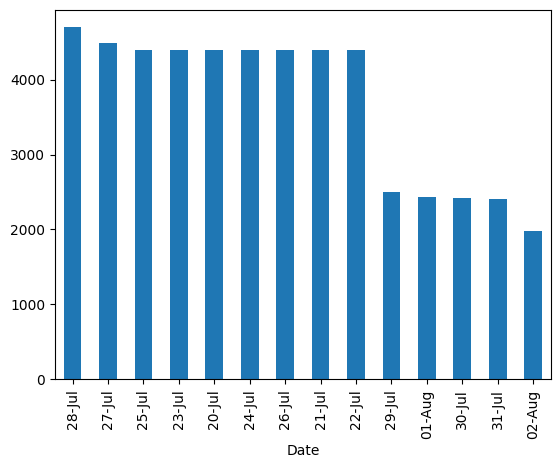

In [16]:
data['Date'].dt.strftime('%d-%b').value_counts().plot(kind='bar')